**Cardiovascular Disease Prediction**

Heart disease, also known as cardiovascular disease, is one of the most serious illnesses in both India and the rest of the globe. According to estimates, cardiac illnesses account for 28.1% of fatalities. More than 17.6 million fatalities, or a large portion of all deaths in 2016, were caused by it in 2016. Therefore, a system that can predict with exact precision and dependability is required for the appropriate and prompt diagnosis as well as the treatment of such diseases. Numerous academics do extensive research utilizing a variety of machine learning algorithms to predict heart illness using different datasets that contain numerous factors that lead to heart attacks. Now it is your turn to do a analysis with the given dataset.

Project Output Instructions :
* Perform data pre-processing operations.
* As a part of data analysis and visualizations draw all the possible plots to provide essential information and to derive some meaningful insights.
* Find out accuracy levels of various machine learning techniques such Random Forest (RF).
* Build your Machine learning model for heart disease detection according to the result.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Original Data
df=pd.read_csv("/content/cardio_train.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**1]Perform data pre-processing operations**

In [4]:
df = pd.read_csv("/content/cardio_train.csv")
print(f"Number of columns: { df.shape[1] }")
print(f"Number of rows: { df.shape[0] }")
df.info()
df['age'] = round(df['age']/365.25,2)
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))
df.describe()
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None

df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)
df.head()

Number of columns: 13
Number of rows: 70000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


**2]As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.**

In [5]:
base_color = sb.color_palette()[0]

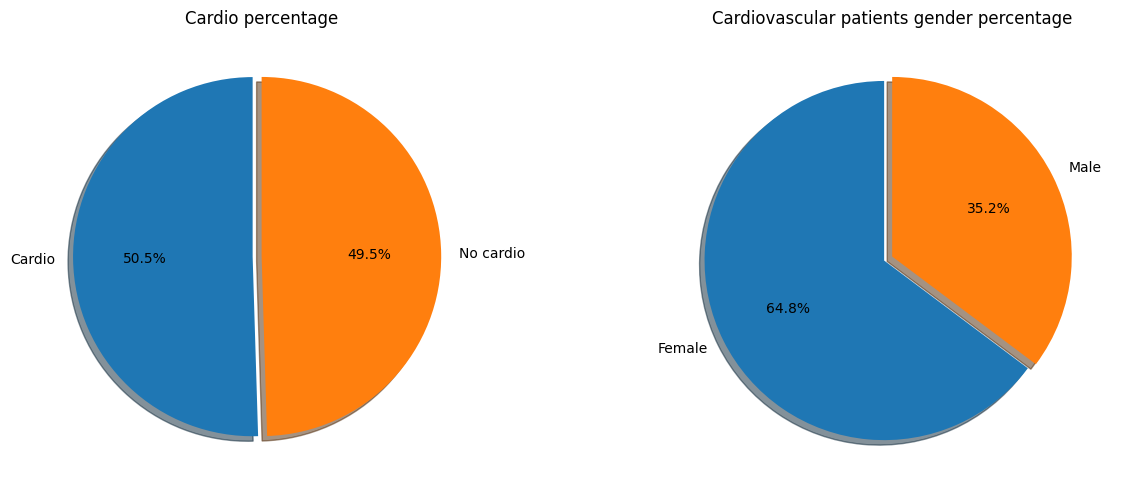

In [6]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')

In [7]:
#Probability and Statistics
!pip install -U scikit-learn
!pip install scikit-learn
!pip install xgboost
!pip install --upgrade scikit-learn
!pip show scikit-learn
!pip install xgboost
from xgboost import XGBClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


**3]Find out accuracy levels of various machine learning techniques such Random Forest (RF).**

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from xgboost import plot_importance
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [9]:
X = df.drop(['cardio', 'bp_cat'], axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
random_model = RandomForestClassifier(n_estimators=51,
                          max_depth=10,
                          random_state=0)

random_model.fit(X_train, y_train)
print(f"Testing accuracy: {round(accuracy_score(random_model.predict(X_test), y_test),4)*100}%")
print(f"Average testing accuracy: {round(cross_validate(random_model, X, y, cv=5)['test_score'].mean()*100,2)}%")

Testing accuracy: 73.38%
Average testing accuracy: 73.44%


**4]Build your Machine learning model for heart disease detection according to the result.**

In [11]:
boost_model = XGBClassifier(verbosity=0, seed=0, n_estimators=150,
                            gamma= 0.24, max_depth=4, learning_rate=0.13,
                            reg_lambda=50.0, scale_pos_weight=1)

boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)
print(f"Testing accuracy: {round((accuracy_score(boost_pred, y_test)*100),2)}%")
xgb_cross = cross_validate(boost_model, X, y, cv=11)
print(f"Average testing accuracy: {round((xgb_cross['test_score'].mean()*100),4)}%")

Testing accuracy: 73.49%
Average testing accuracy: 73.5751%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

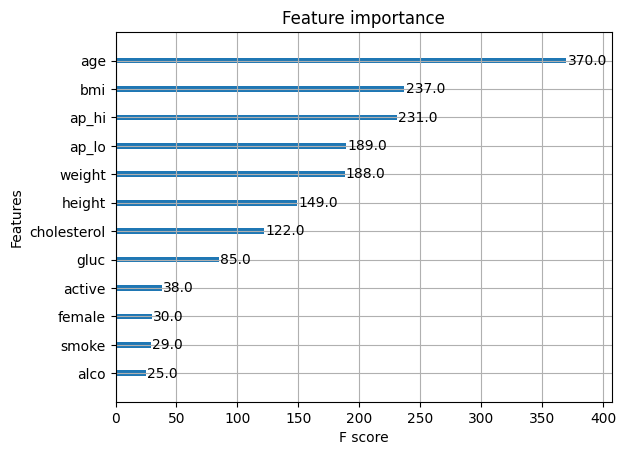

In [12]:
plot_importance(boost_model)

**Conclusion**

Using the XGBoost classifier for cardiovascular disease prediction yields promising results, with high accuracy and robust performance. Its ability to handle complex datasets and feature interactions enhances predictive power, aiding in early detection and prevention strategies. Through meticulous feature engineering and model tuning, XGBoost emerges as a valuable tool in mitigating the burden of cardiovascular diseases, potentially saving lives and improving public health outcomes.